In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline

# General Graphs

### 1. Discrepancy Between Male and Female Literacy
> Created a new CSV file with literacy rates for male and female to establish the significant difference between male and female literacy rates in India

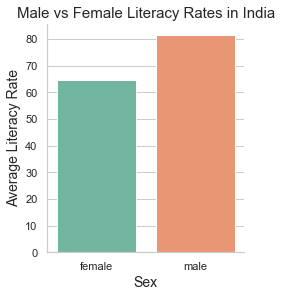

In [2]:
df = pd.read_csv('Lit_Rate_Summary.csv')
sns.set_theme(style="whitegrid")

g = sns.catplot(x= 'sex', y= 'mean_lit_rate', data = df, height = 4, kind = 'bar', aspect = .9, palette = 'Set2')
g = plt.xlabel('Sex', fontsize=14)
g = plt.ylabel('Average Literacy Rate', fontsize=14)
g = plt.title("Male vs Female Literacy Rates in India", fontsize=15)

### 2. Statewise Literacy Rates
> Looking at the top 5 states with the highest literacy rates, and the bottom 5 states with the lowest literacy rates. 

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Kerala'),
  Text(1, 0, 'Lakshadweep                   '),
  Text(2, 0, 'Mizoram                       '),
  Text(3, 0, 'Bihar'),
  Text(4, 0, 'Arunachal Pradesh'),
  Text(5, 0, 'Rajasthan                     ')])

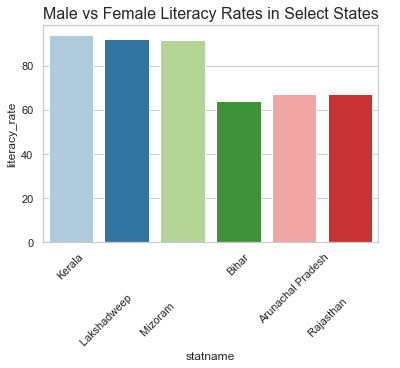

In [39]:

data = pd.read_csv('2015_16_Statewise_Secondary.csv')
top_3 = data.sort_values(by='literacy_rate', ascending=False).head(3)
bottom_3 = data.sort_values(by='literacy_rate', ascending=True).head(3)
top_and_bottom = pd.concat([top_3, bottom_3]).loc[:, ['statname', 'literacy_rate', 'male_literacy_rate', 'female_literacy_rate', 'sexratio']]
top_and_bottom['lit_difference_m_f'] = data['male_literacy_rate'] - data['female_literacy_rate']

sns.barplot(x="statname", y="literacy_rate", data=top_and_bottom, palette = 'Paired')
plt.title("Male vs Female Literacy Rates in Select States", fontsize = 16)
plt.xticks(rotation = 45)



(-0.5, 5.5, 40.0, 100.0)

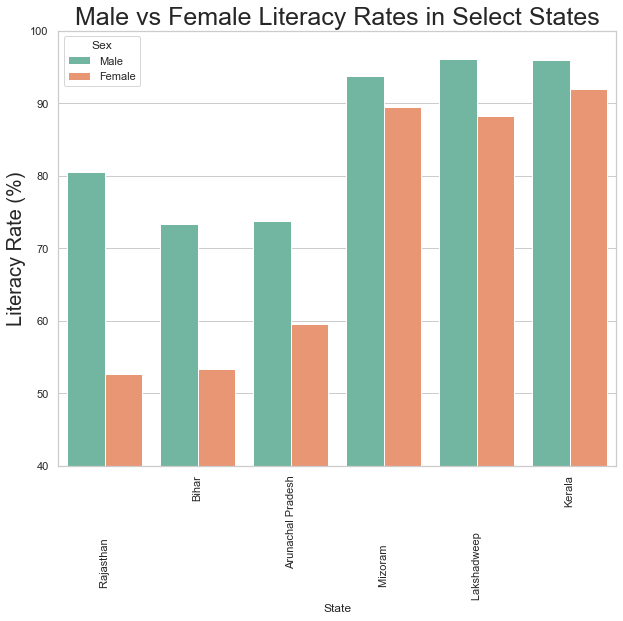

In [62]:

data = pd.read_csv('Top_bottom_lit_rates.csv')

plt.figure(figsize=(10,8))
sns.barplot(x="State", y="Literacy Rate",hue="Sex", data=data, palette = 'Set2')
plt.title("Male vs Female Literacy Rates in Select States", fontsize = 25)
plt.ylabel('Literacy Rate (%)', fontsize = 20)
plt.xticks(rotation=90)
plt.axis(ymin = 40, ymax = 100)


### 3. Percent Government Schools

1. Total Percent Government Schools vs Private Schools in India

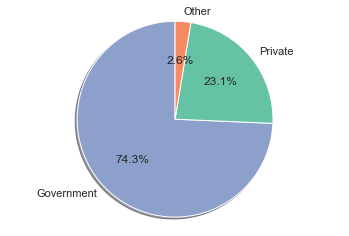

In [5]:
df3 = pd.read_csv('2015_16_Districtwise.csv')

gvmt = df3['SCHTOTG'].sum()
private = df3['SCHTOTP'].sum()
other = df3['SCHTOTM'].sum()


#plt.subplot(1,4,i)
top = ['Government','Private', 'Other']
#uttar = dataF.loc[dataF['State Name'] == dataF['State Name'][i],:]
value =[gvmt, private, other]
colors = ['#8da0cb','#65c2a5','#f68a63']
a = plt.pie(value, labels=top, autopct='%1.1f%%', shadow=True, startangle=90, colors = colors)
a = plt.axis('equal')


2. Percentages of Gvmt and Private Schools in different states

   index         State Name  Percent Gov Schools  Percent Private Schools
1      2  ARUNACHAL PRADESH            87.401005                12.598995
2      4              BIHAR            89.159213                10.840787
3     17             KERALA            29.168057                70.831943
4     18        LAKSHADWEEP           100.000000                 0.000000
5     23            MIZORAM            75.079047                24.920953
6     28          RAJASTHAN            66.351629                33.648371


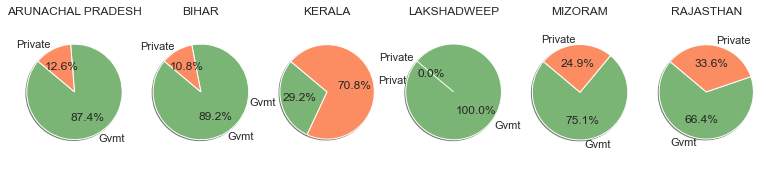

In [6]:
df2 = pd.read_csv('2015_16_Districtwise.csv')
df2['percent_government_school'] = df2['SCHTOTG']/df2['SCHTOT']

ser = df2.groupby('STATNAME')['percent_government_school'].mean()

dataF = pd.DataFrame()
dataF['State Name'] = ser.index
dataF['Percent Gov Schools'] = ser.values * 100
dataF['Percent Private Schools'] = 100 - (ser.values * 100)

top_bottom = ['RAJASTHAN', 'BIHAR', 'ARUNACHAL PRADESH', 'MIZORAM', 'LAKSHADWEEP', 'KERALA']
d = dataF[dataF['State Name'].str.contains('|'.join(top_bottom))]
d = d.reset_index()
d.index = np.arange(1, len(d) + 1)

print(d.head(6))

plt.figure(figsize=(20,12))
for i in range(1,len(d)+1):
    plt.subplot(4, 9, i)
    plt.title(d['State Name'][i])
    top = ['Gvmt','Private']
    uttar = d.loc[d['State Name'] == d['State Name'][i],:]
    value =[d['Percent Gov Schools'][i], d['Percent Private Schools'][i]]
    colors = ['#7ab575','#fc8d62']
    plt.pie(value, labels=top, autopct='%1.1f%%', shadow=True, startangle=140, colors = colors)
    plt.axis('equal')
    

# Results

### 1. The Effect of Sex Ratios on Female Literacy Rates (Null)
There is little variation in Sex Ratios, and no correlation between Sex Ratios and Female Literacy. 

Text(32.72367638888889, 0.5, 'Female Literacy Rate')

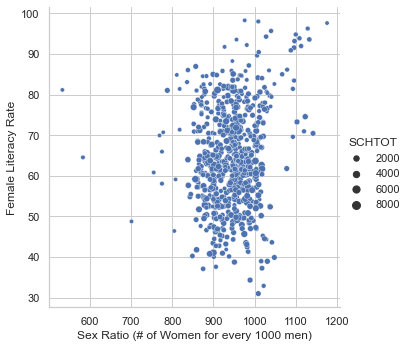

In [7]:
df2 = pd.read_csv('2015_16_Districtwise.csv')
sns.relplot(x = df2['SEXRATIO'], y = df2['FEMALE_LIT'], data = df2, size = 'SCHTOT')
plt.xlabel('Sex Ratio (# of Women for every 1000 men)')
plt.ylabel('Female Literacy Rate')


### 2.  The Effect of the Percent Urban Population on Female Literacy Rates

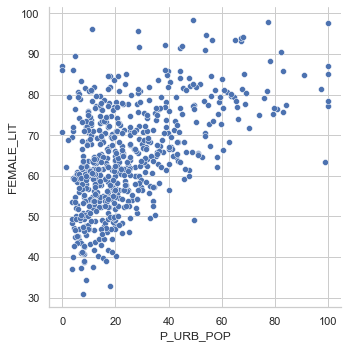

In [8]:
df2 = pd.read_csv('2015_16_Districtwise.csv')
df2 = df2[df2['P_URB_POP'] >= 0]
sns.relplot(data = df2, x = 'P_URB_POP', y = 'FEMALE_LIT')


<AxesSubplot:xlabel='P_URB_POP', ylabel='FEMALE_LIT'>

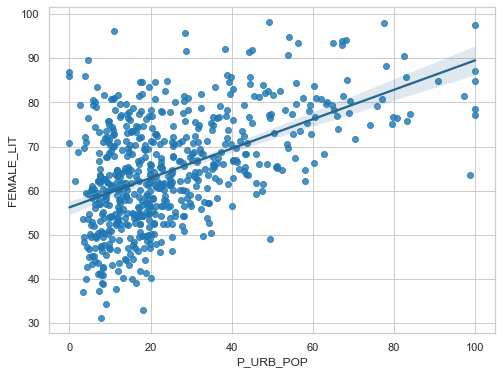

In [32]:
plt.figure(figsize=(8,6))
df2 = pd.read_csv('2015_16_Districtwise.csv')
df2 = df2[df2['P_URB_POP'] >= 0]
sns.regplot(data = df2, x = 'P_URB_POP', y = 'FEMALE_LIT', scatter_kws={"color": "#1f78b4"}, line_kws={"color": "#26658e"})
plt.xlabel('Sex Ratio (# of Women for every 1000 men)')
plt.ylabel('Female Literacy Rate')


Summary Statistics:
- p value: very close to 0.000
- correlation coefficient (r) = 0.4901

Results of the pearson correlation indicated that there is a significant medium positive relationship between X and Y, (r(629) = .49, p < .001).


### 3. Effect of Urban Population Percent on Literacy Difference

<Figure size 576x432 with 0 Axes>

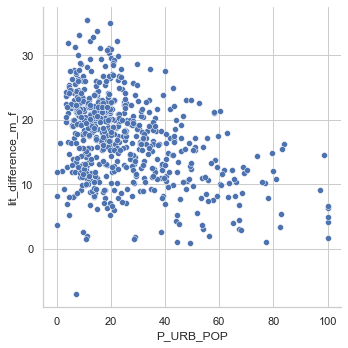

In [33]:
df2['lit_difference_m_f'] = df2['MALE_LIT'] - df2['FEMALE_LIT']
sns.relplot(data = df2, x = df2['P_URB_POP'], y = df2['lit_difference_m_f'])

Text(0.5, 1.0, 'The Effect of Urbanization on Male-Female Literacy Differences')

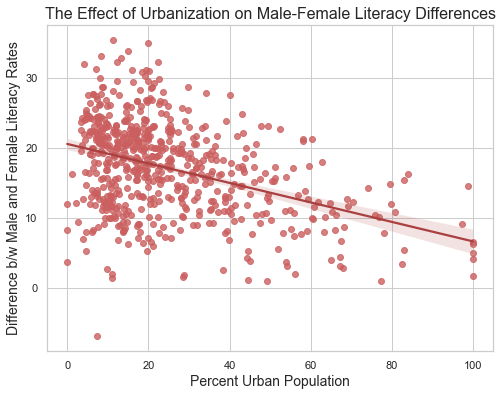

In [64]:
plt.figure(figsize=(8,6))
sns.regplot(data = df2, x = 'P_URB_POP', y = 'lit_difference_m_f', order = 1, scatter_kws={"color": "#Cb5f5f"}, line_kws={"color": "#Aa4040"})
plt.xlabel('Percent Urban Population', fontsize = 14)
plt.ylabel('Difference b/w Male and Female Literacy Rates', fontsize = 14)
plt.title('The Effect of Urbanization on Male-Female Literacy Differences', fontsize = 16)


**Summary Statistics:**
    
- p value: 3.237e-22
- correlation coefficient (r) = -0.3726

Results of the pearson correlation indicated that there is a **significant small negative relationship** between X and Y, (r(629) = .373, p < .001).


## 4. Effect of Government v Private Schools on Literacy Rates

### ***Government Schools: Lit diff***

Text(0, 0.5, 'Difference Between Male and Female Literacy Rates')

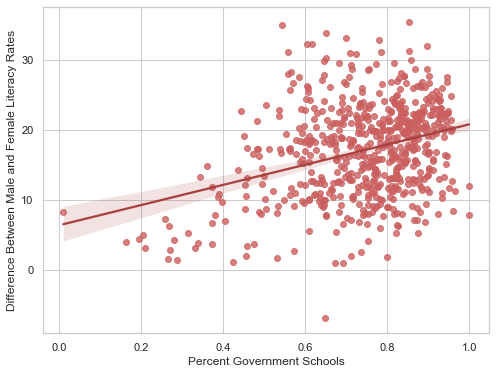

In [42]:
plt.figure(figsize=(8,6))
df2['percent_government_school'] = df2['SCHTOTG']/df2['SCHTOT']
df2['lit_difference_m_f'] = df2['MALE_LIT'] - df2['FEMALE_LIT']
sns.regplot(data = df2, x = df2['percent_government_school'], y = df2['lit_difference_m_f'], scatter_kws={"color": "#Cb5f5f"}, line_kws={"color": "#Aa4040"})
plt.xlabel('Percent Government Schools')
plt.ylabel('Difference Between Male and Female Literacy Rates')

**Summary Statistics:**
    
- p value: very close to 0.000
- correlation coefficient (r) = .329

Results of the pearson correlation indicated that there is a **significant medium positive relationship** between X and Y, (r(629) = .329, p < .001).


### ***Government Schools: Overall Lit***

Text(0, 0.5, 'Overall Literacy Rate')

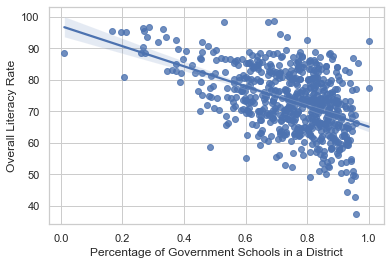

In [63]:
df2['percent_government_school'] = df2['SCHTOTG']/df2['SCHTOT']
df2['lit_difference_m_f'] = df2['MALE_LIT'] - df2['FEMALE_LIT']
sns.regplot(data = df2, x = df2['percent_government_school'], y = df2['OVERALL_LI'])
plt.xlabel('Percentage of Government Schools in a District')
plt.ylabel('Overall Literacy Rate')

**Summary Statistics:**
    
- p value: 	5.243e-37
- correlation coefficient (r) = -.476

Results of the pearson correlation indicated that there is a **significant small negative relationship** between X and Y, (r(629) = .476, p < .001).


### ***Private Schools and Lit Diff***

<AxesSubplot:xlabel='percent_private_school', ylabel='lit_difference_m_f'>

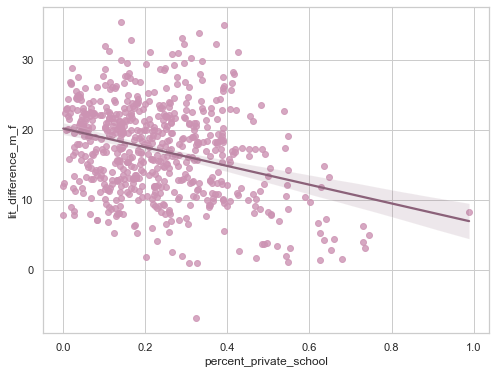

In [36]:
plt.figure(figsize=(8,6))
df2['percent_private_school'] = df2['SCHTOTP']/df2['SCHTOT']
df2['lit_difference_m_f'] = df2['MALE_LIT'] - df2['FEMALE_LIT']
sns.regplot(data = df2, x = 'percent_private_school', y = 'lit_difference_m_f', scatter_kws={"color": "#cc93b3"}, line_kws={"color": "#8b6179"})

**Summary Statistics:**
    
- p value: 2.553e-15
- correlation coefficient (r) = -.308

Results of the pearson correlation indicated that there is a **significant small negative relationship** between X and Y, (r(629) = .308, p < .001).


### ***Private Schools and Overall Lit***

<AxesSubplot:xlabel='percent_private_school', ylabel='OVERALL_LI'>

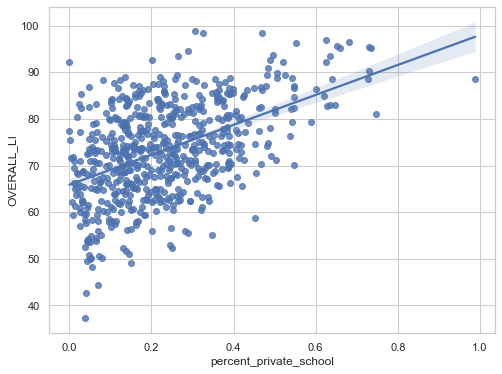

In [49]:
plt.figure(figsize=(8,6))
df2['percent_private_school'] = df2['SCHTOTP']/df2['SCHTOT']
sns.regplot(data = df2, x = 'percent_private_school', y = 'OVERALL_LI')

**Summary Statistics:**
    
- p value: very close to 0.000
- correlation coefficient (r) = .481

Results of the pearson correlation indicated that there is a **significant medium positive relationship** between X and Y, (r(629) = .481, p < .001).

## 4. Effect of Computer & Internet Access on Literacy Rates

Text(0, 0.5, 'Overall Literacy Rates')

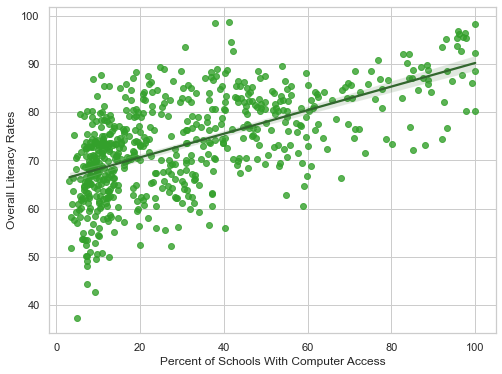

In [65]:
plt.figure(figsize=(8,6))
df2['schools_with_comp'] = (df2['SCOMPTOT'] / df2['SCHTOT']) * 100
sns.regplot(x = 'schools_with_comp', y = 'OVERALL_LI', data = df2, scatter_kws={"color": "#33a02b"}, line_kws={"color": "#32672e"})
plt.xlabel('Percent of Schools With Computer Access')
plt.ylabel('Overall Literacy Rates')

**Summary Statistics:**
    
- p value: very close to 0.000
- correlation coefficient (r) = 0.5935

Results of the pearson correlation indicated that there is a **significant large positive relationship** between X and Y, (r(632) = .593, p < .001).
